In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engagement-score-prediction/test_1zqHu22.csv
/kaggle/input/engagement-score-prediction/sample_submission_JPlpRcN.csv
/kaggle/input/engagement-score-prediction/train_0OECtn8.csv


In [2]:
data = pd.read_csv("../input/engagement-score-prediction/train_0OECtn8.csv")
data.head()
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [4]:
data.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [5]:
data = data.drop(["row_id"],axis=1)

In [6]:
data.describe()

,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [7]:
percentile25 = data["age"].quantile(0.25)
percentile75 = data["age"].quantile(0.75)

In [8]:
iqr = percentile75 - percentile25
print(iqr)

14.0


In [9]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [10]:
data[data['age'] < upper_limit]
data[data['age'] > lower_limit]

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,Male,Other,340,662,3.91
89193,20466,20,47,31,Male,Other,240,892,3.56
89194,13655,16,97,25,Male,Student,270,462,4.23
89195,24840,9,18,35,Male,Working Professional,230,819,3.77


In [11]:
new_df = data[data['age'] < upper_limit]
new_df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13


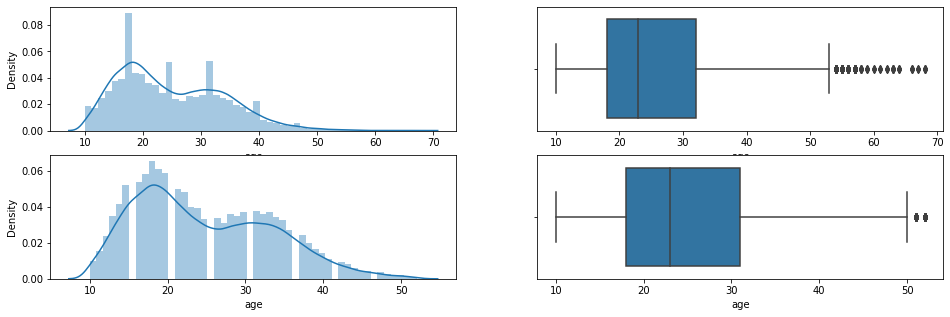

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(data['age'])
plt.subplot(2,2,2)
sns.boxplot(data["age"])

plt.subplot(2,2,3)
sns.distplot(new_df["age"])
plt.subplot(2,2,4)
sns.boxplot(new_df["age"])

plt.show()


In [13]:
percentile25 = data["followers"].quantile(0.25)
percentile75 = data["followers"].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)

50.0


In [14]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data[data['followers'] < upper_limit]
data[data['followers'] > lower_limit]


,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,Male,Other,340,662,3.91
89193,20466,20,47,31,Male,Other,240,892,3.56
89194,13655,16,97,25,Male,Student,270,462,4.23
89195,24840,9,18,35,Male,Working Professional,230,819,3.77


In [15]:
new_df = new_df[new_df['followers'] < upper_limit ]
new_df = new_df[new_df['followers'] > lower_limit ]

new_df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13


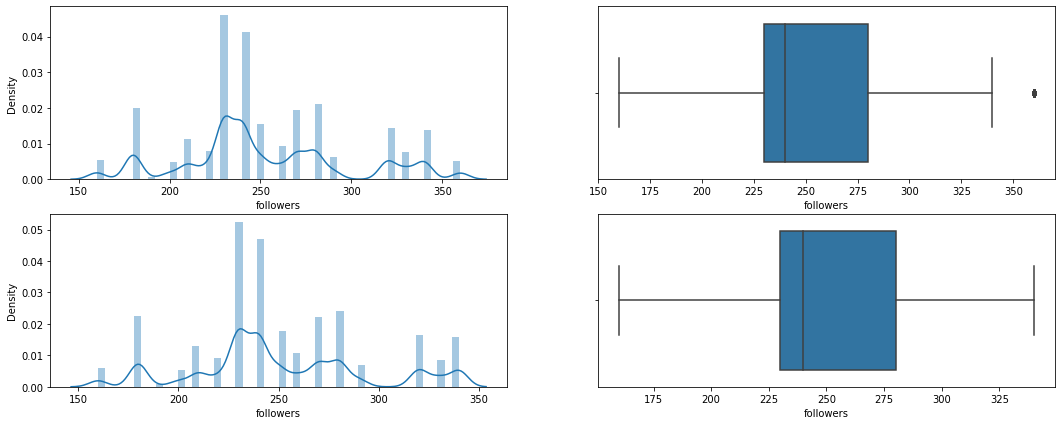

In [16]:
plt.figure(figsize=(18,7))
plt.subplot(2,2,1)
sns.distplot(data['followers'])
plt.subplot(2,2,2)
sns.boxplot(data["followers"])

plt.subplot(2,2,3)
sns.distplot(new_df["followers"])
plt.subplot(2,2,4)
sns.boxplot(new_df["followers"])

plt.show()

Vews

In [17]:
percentile25 = data["views"].quantile(0.25)
percentile75 = data["views"].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)

485.0


In [18]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data[data['views'] < upper_limit]
data[data['views'] > lower_limit]

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,Male,Other,340,662,3.91
89193,20466,20,47,31,Male,Other,240,892,3.56
89194,13655,16,97,25,Male,Student,270,462,4.23
89195,24840,9,18,35,Male,Working Professional,230,819,3.77


In [19]:
new_df = new_df[new_df['views'] < upper_limit ]
new_df = new_df[new_df['views'] > lower_limit ]

new_df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13


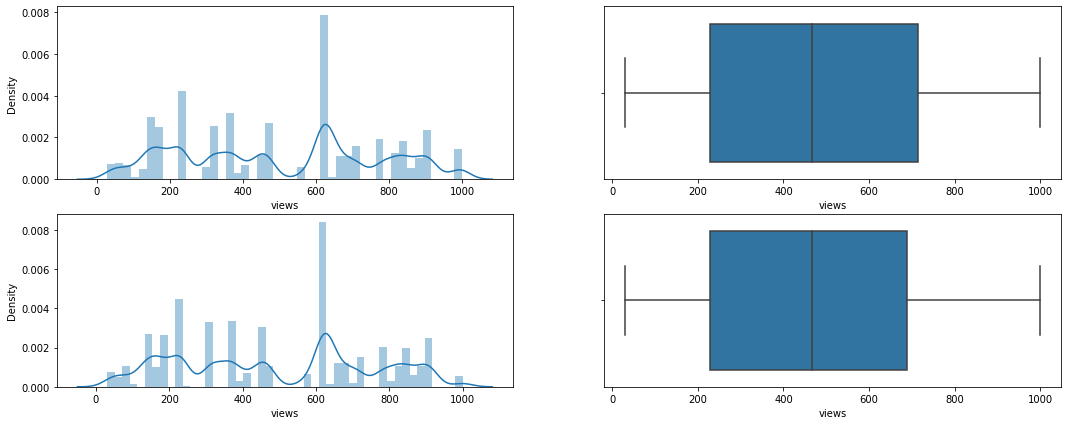

In [20]:
plt.figure(figsize=(18,7))
plt.subplot(2,2,1)
sns.distplot(data['views'])
plt.subplot(2,2,2)
sns.boxplot(data["views"])

plt.subplot(2,2,3)
sns.distplot(new_df["views"])
plt.subplot(2,2,4)
sns.boxplot(new_df["views"])

plt.show()

engagement_score

In [21]:
percentile25 = data["engagement_score"].quantile(0.25)
percentile75 = data["engagement_score"].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)

1.25


In [22]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data[data['engagement_score'] < upper_limit]
data[data['engagement_score'] > lower_limit]

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,Male,Other,340,662,3.91
89193,20466,20,47,31,Male,Other,240,892,3.56
89194,13655,16,97,25,Male,Student,270,462,4.23
89195,24840,9,18,35,Male,Working Professional,230,819,3.77


In [23]:
new_df = new_df[new_df['engagement_score'] < upper_limit ]
new_df = new_df[new_df['engagement_score'] > lower_limit ]

new_df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,24,Male,Student,180,1000,4.33
1,5304,32,132,14,Female,Student,330,714,1.79
2,1840,12,24,19,Male,Student,180,138,4.35
3,12597,23,112,19,Male,Student,220,613,3.77
4,13626,23,112,27,Male,Working Professional,220,613,3.13


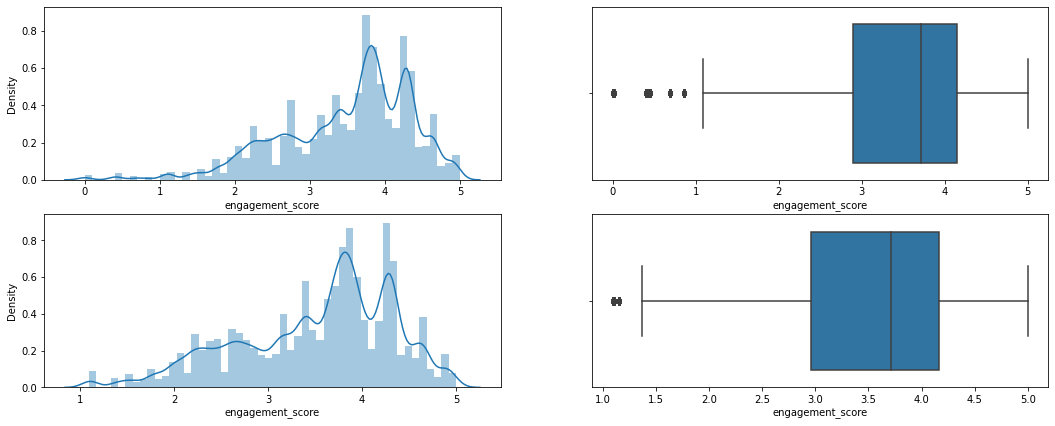

In [24]:
plt.figure(figsize=(18,7))
plt.subplot(2,2,1)
sns.distplot(data['engagement_score'])
plt.subplot(2,2,2)
sns.boxplot(data["engagement_score"])

plt.subplot(2,2,3)
sns.distplot(new_df["engagement_score"])
plt.subplot(2,2,4)
sns.boxplot(new_df["engagement_score"])

plt.show()

In [25]:
new_df.profession.value_counts()

Student                 43532
Other                   25968
Working Professional    16791
Name: profession, dtype: int64

new_dfdent                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

In [26]:
one_hot_encoding_columns = ["gender","profession"]

In [27]:
new_df = pd.get_dummies(new_df, columns = ["gender"])
new_df = new_df.drop(["gender_Male"],axis=1)
new_df.head()

,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_Female
0,19990,37,128,24,Student,180,1000,4.33,0
1,5304,32,132,14,Student,330,714,1.79,1
2,1840,12,24,19,Student,180,138,4.35,0
3,12597,23,112,19,Student,220,613,3.77,0
4,13626,23,112,27,Working Professional,220,613,3.13,0


In [28]:
new_df = pd.get_dummies(new_df, columns = ["profession"])
new_df = new_df.drop(["profession_Other"],axis=1)
new_df.head()

,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Female,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,4.33,0,1,0
1,5304,32,132,14,330,714,1.79,1,1,0
2,1840,12,24,19,180,138,4.35,0,1,0
3,12597,23,112,19,220,613,3.77,0,1,0
4,13626,23,112,27,220,613,3.13,0,0,1


In [29]:
X = new_df.drop(["engagement_score"],axis=1)
y = new_df.engagement_score

In [30]:
X.head()

,user_id,category_id,video_id,age,followers,views,gender_Female,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,0,1,0
1,5304,32,132,14,330,714,1,1,0
2,1840,12,24,19,180,138,0,1,0
3,12597,23,112,19,220,613,0,1,0
4,13626,23,112,27,220,613,0,0,1


In [31]:
y.head()

0    4.33
1    1.79
2    4.35
3    3.77
4    3.13
Name: engagement_score, dtype: float64

In [32]:
# min-max normalization (numeric variables)
# min_max_columns = ['age', 'followers', 'views']

# # scale numerical variables using min max scaler
# for column in min_max_columns:
#         # minimum value of the column
#         min_column = X[column].min()
#         # maximum value of the column
#         max_column = X[column].max()
#         # min max scaler
#         X[column] = (X[column] - min_column) / (max_column - min_column)  

In [33]:
from sklearn.metrics import r2_score as r2
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# for esti in range(800,2000,100):
#     for lr in [0.02,0.05, 0.08, 0.2, 0.6, 0.8]:
#         XGB = XGBRegressor(n_estimators= esti, learning_rate= lr, random_state=42)
#         XGB.fit(X_train,y_train)
#         y_train_PredictionXGB = XGB.predict(X_train)
#         error_train =  r2(y_train, y_train_PredictionXGB)
#         print("training score is : " ,error_train,"esti is:",esti, "lr is :", lr)

#         y_valid_PredictionXGB = XGB.predict(X_valid)
#         y_valid_PredictionXGB = y_valid_PredictionXGB.astype("float64")
#         error_valid =  r2(y_valid, y_valid_PredictionXGB)
#         print("validation score is :",error_valid)

In [36]:
XGB = XGBRegressor(n_estimators= 2600, learning_rate= 0.2, random_state=42)
XGB.fit(X_train,y_train)
y_train_PredictionXGB = XGB.predict(X_train)
error_train =  r2(y_train, y_train_PredictionXGB)
print("training score is : " ,error_train)

y_valid_PredictionXGB = XGB.predict(X_valid)
y_valid_PredictionXGB = y_valid_PredictionXGB.astype("float64")
error_valid =  r2(y_valid, y_valid_PredictionXGB)
print("validation score is :",error_valid)

training score is :  0.8452402817102539
validation score is : 0.4225066628315072


XGB = XGBRegressor(n_estimators= 900, learning_rate= 0.3, random_state=0)
training score is :  0.7403330991102582
validation score is : 0.4098301114838582

1500 0.2 --------------
training score is :  0.7560923425639567
validation score is : 0.41723775645105066

In [37]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression
# # X_test, y_test = make_regression(n_features=4, n_informative=2,
# #                         random_state=0, shuffle=False)
# RF = RandomForestRegressor(max_depth=10, random_state=0,n_estimators= 900)
# RF.fit(X_train, y_train)
# y_train_PredictionRF = RF.predict(X_train)
# error_train_RF =  r2(y_train, y_train_PredictionRF)
# print("training score is RF : " ,error_train_RF)


# y_valid_PredictionRF = RF.predict(X_valid)
# error_valid_RF =  r2(y_valid, y_valid_PredictionRF)
# print("validation score is :",error_valid_RF)


In [38]:
# LGM = LGBMRegressor(max_depth = 25,learning_rate = 0.1,n_estimators= 1500)
# LGM.fit(X_train, y_train)
# y_train_PredictionLGM = LGM.predict(X_train)
# error_train_LGM =  r2(y_train, y_train_PredictionLGM)
# print("training score is LGM : " ,error_train_LGM)


# y_valid_PredictionLGM = LGM.predict(X_valid)
# error_valid_LGM =  r2(y_valid, y_valid_PredictionLGM)
# print("validation score is LGM :",error_valid_LGM)



In [39]:
# from catboost import CatBoostRegressor
# CAT = CatBoostRegressor(verbose=0, n_estimators=1500,learning_rate = 0.2)
# CAT.fit(X_train, y_train)
# y_train_PredictionCAT = CAT.predict(X_train)
# error_train_CAT =  r2(y_train, y_train_PredictionCAT)
# print("training score is CAT : " ,error_train_CAT)


# y_valid_PredictionCAT = CAT.predict(X_valid)
# error_valid_CAT =  r2(y_valid, y_valid_PredictionCAT)
# print("validation score is CAT :",error_valid_CAT) 

In [40]:
# from sklearn.ensemble import GradientBoostingRegressor
# GBR = GradientBoostingRegressor(max_depth=10, n_estimators=1000, learning_rate=0.2)
# GBR.fit(X_train, y_train)
# y_train_PredictionGBR = GBR.predict(X_train)
# error_train_GBR =  r2(y_train, y_train_PredictionGBR)
# print("training score is GBR : " ,error_train_GBR)


# y_valid_PredictionGBR = GBR.predict(X_valid)
# error_valid_GBR =  r2(y_valid, y_valid_PredictionGBR)
# print("validation score is GBR :",error_valid_GBR)

In [41]:
test_data = pd.read_csv("../input/engagement-score-prediction/test_1zqHu22.csv")
test_data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [42]:
X = test_data.drop(["row_id"],axis=1)

In [43]:
X.head()

,user_id,category_id,video_id,age,gender,profession,followers,views
0,7986,12,42,14,Male,Student,180,138
1,11278,34,115,14,Male,Student,230,840
2,17245,8,110,44,Female,Working Professional,280,628
3,9851,16,137,18,Male,Student,270,462
4,16008,34,96,47,Female,Other,230,840


In [44]:
X = pd.get_dummies(X, columns = ["gender"])
X = X.drop(["gender_Male"],axis=1)
X.head()

,user_id,category_id,video_id,age,profession,followers,views,gender_Female
0,7986,12,42,14,Student,180,138,0
1,11278,34,115,14,Student,230,840,0
2,17245,8,110,44,Working Professional,280,628,1
3,9851,16,137,18,Student,270,462,0
4,16008,34,96,47,Other,230,840,1


In [45]:
X = pd.get_dummies(X, columns = ["profession"])
X = X.drop(["profession_Other"],axis=1)
X.head()

,user_id,category_id,video_id,age,followers,views,gender_Female,profession_Student,profession_Working Professional
0,7986,12,42,14,180,138,0,1,0
1,11278,34,115,14,230,840,0,1,0
2,17245,8,110,44,280,628,1,0,1
3,9851,16,137,18,270,462,0,1,0
4,16008,34,96,47,230,840,1,0,0


In [46]:
y_test = XGB.predict(X)

In [47]:
submission = pd.DataFrame()

In [48]:
submission["row_id"] = test_data.row_id
submission["engagement_score"] = y_test

In [49]:
submission.head()

,row_id,engagement_score
0,89198,4.115265
1,89199,3.621167
2,89200,2.811002
3,89201,2.961869
4,89202,2.006569


In [50]:
submission.to_csv('13Feb6sub.csv', index=False)